#### Intro to Pandas
***
Following [this](http://pandas.pydata.org/pandas-docs/stable/10min.html) tutorial.

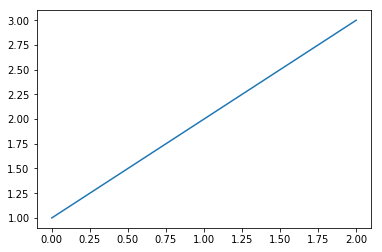

In [50]:
%matplotlib inline
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# Convenience imports
from IPython.display import display # display(your_stuff)
plot([1, 2, 3])

##### Object Creation
***

In [53]:
# Create a Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
# Create a DataFrame

# create dates separated into periods - which are just days
dates = pd.date_range('20130101', periods=6)
display(dates)

# create an arary: np.random.randn(6, 4) -> array(y, x) of random numbers
display(np.random.randn(6, 4))

# pd.DataFrame(row_values, index=row_names, columns=column_names)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
display(df)

In [ ]:
# create dataframe from a dictionary - {col_name: values}
#     >> np.array([[1, 2], [3, 4]], dtype="int32"): 
#        array([[3, 3, 3, 3],
#               [3, 3, 3, 3]], dtype=int32)
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

print ("Dictionary representation:")
display(df2.to_dict())

print ("Data frame representation:")
display(df2)

print ("Check all data types:")
display(df2.dtypes)

#### Viewing Data
***

In [ ]:
# see the top & bottom rows of the frame
print "Display all data frame:"
display(df)

print "Display top 2 rows:"
display(df.head(2))

print "Display bottom 3 rows:"
display(df.tail(3))

In [ ]:
# display index (row_names), columns, and underlying numpy data
display(df.index)

display(df.columns)

display(df.values) 

display(df.describe())

In [ ]:
# take actions on the data
print "Transpose (pivot) the data: "
display(df.T)

print "Sort the data: "
display(df)
display(df.sort_index(axis=1, ascending=False))

In [ ]:
"""
    - Open a file with columns and rows
    - clean rows with particular values
    - reindex the data frame
    - add missing data for missing indexes
    - convert columns to list/dict
"""
import pandas as pd
import csv

data_file = open('/Users/whitehat/Desktop/facs_standard.txt', 'r')
file_name = os.path.basename(data_file.name).split('.')[0]

sniffer = csv.Sniffer()
dialect = sniffer.sniff(data_file.read().replace('\r', '\n'))
print (dialect.delimiter)
# returns ','
data_file.seek(0) # return to the beginning of the file

df = pd.read_csv(data_file, sep=dialect.delimiter)
antigens = df.columns[1:]
current_indexes = [int(line.split(":")[0]) for line in df['Sample'] if line not in ('Mean', 'StdDev')]
full_index = range(1, 97)

# ~df['column_name'].isin(some_values) == # df = df[df.Sample != 'Mean'] and df = df[df.Sample != 'StdDev']
df = df.loc[~df['Sample'].isin(['Mean', 'StdDev'])]
df.index += 1
df.index = current_indexes
df = df.reindex(full_index, fill_value=1)
result = {"{} - {}".format(file_name, antigen): list(df[antigen])  for antigen in antigens}
df

In [70]:
# Analyzing Chipotle Data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(url, sep='\t')
# df.head(10)
df = df[df.choice_description.notnull()]
df.item_price = df.item_price.str.replace('$', '')
df.item_price = df.item_price.astype(float)
df[df.item_price > 10].head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98


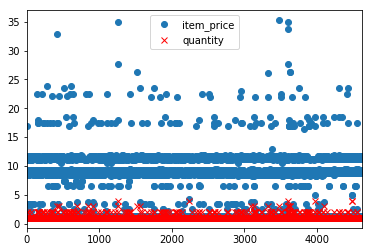

In [76]:
df.describe()
df[['item_price', 'quantity']].plot(style=['o', 'rx'])

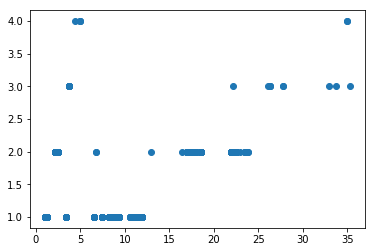

In [82]:
plt.scatter(df['item_price'], df['quantity'])

In [86]:
print('Unique Values: ', df['item_name'].unique())
print('Catagory Count: ', df['item_name'].value_counts())

Unique Values:  ['Izze' 'Nantucket Nectar' 'Chicken Bowl' 'Steak Burrito'
 'Steak Soft Tacos' 'Chicken Crispy Tacos' 'Chicken Soft Tacos'
 'Chicken Burrito' 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito'
 'Carnitas Bowl' 'Barbacoa Bowl' 'Chicken Salad Bowl' 'Steak Bowl'
 'Barbacoa Soft Tacos' 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Barbacoa Crispy Tacos' 'Veggie Salad Bowl' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl' '6 Pack Soft Drink'
 'Bowl' 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Veggie Soft Tacos' 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad'
 'Veggie Crispy Tacos' 'Veggie Salad' 'Carnitas Salad']
Catagory Count:  Chicken Bowl             726
Chicken Burrito          553
Steak Burrito            368
Canned Soft Drink        301
Steak Bowl               211
Chicken Soft Tacos       115
Chicken Salad Bowl       110
Canned Soda              104
Veggie Burrito            95
Barbacoa Burrito          91

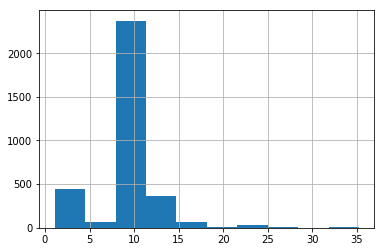

In [90]:
df['item_price'].hist(bins=10)

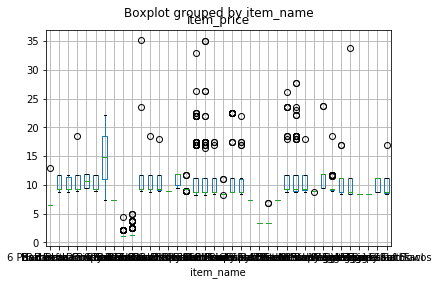

In [92]:
df.boxplot(column='item_price', by='item_name')

***
#### Loadn Predition Analysis


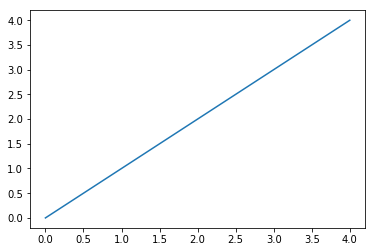

In [59]:
training_set = 'data/loan_predict/train.csv'
df = pd.read_csv(training_set, sep=',')
plot(range(5))

In [57]:
df.head()

,1,0,0.1,1.1,0.2,5849,0.3,0.4,360,1.2,1.3,1.4
0,1,1,1,1,0,4583,1508.0,128,360,1,0,0
1,1,1,0,1,1,3000,0.0,66,360,1,1,1
2,1,1,0,0,0,2583,2358.0,120,360,1,1,1
3,1,0,0,1,0,6000,0.0,141,360,1,1,1
4,1,1,2,1,1,5417,4196.0,267,360,1,1,1
